In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install TensorFlow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install keras-preprocessing

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow import keras

In [6]:
keras.__version__

'2.2.4-tf'

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

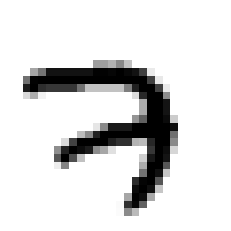

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

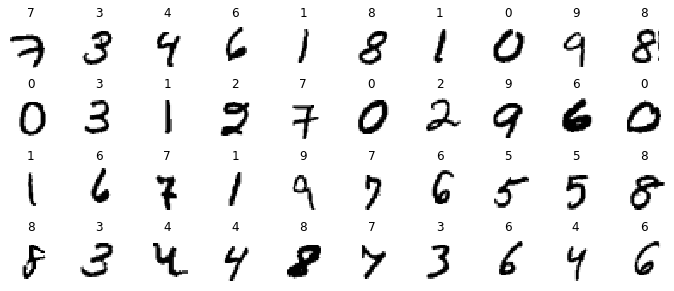

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [21]:
import numpy as np

In [23]:
import tensorflow as tf

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [27]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 4s 66us/sample - loss: nan - accuracy: 0.5822 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

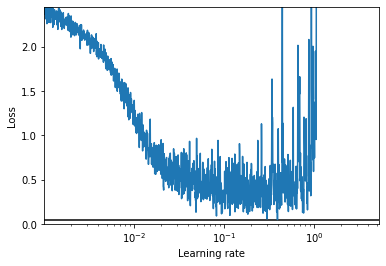

In [28]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [34]:
import os

In [35]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 69us/sample - loss: 0.2363 - accuracy: 0.9277 - val_loss: 0.1144 - val_accuracy: 0.9656
Epoch 2/100
55000/55000 [==============================] - 5s 97us/sample - loss: 0.0954 - accuracy: 0.9701 - val_loss: 0.0814 - val_accuracy: 0.9778
Epoch 3/100
55000/55000 [==============================] - 4s 71us/sample - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 4/100
55000/55000 [==============================] - 5s 96us/sample - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.0840 - val_accuracy: 0.9760
Epoch 5/100
55000/55000 [==============================] - 4s 66us/sample - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.4316 - val_accuracy: 0.9108
Epoch 6/100
55000/55000 [==============================] - 4s 65us/sample - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 7/100
55000/55000 [==========================

In [37]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0726 - accuracy: 0.9797


[0.07260669159166501, 0.9797]

In [39]:
%load_ext tensorboard

In [40]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 17428.

#Help from https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb 